In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
import functools
import tensorflow as tf
import numpy as np
import pandas as pd
from datetime import datetime
import math

Using TensorFlow backend.


In [2]:
df_hiragana = pd.read_csv("all_hiragana.csv",error_bad_lines=False)
print(df_hiragana.shape)

b'Skipping line 2243: expected 901 fields, saw 1601\n'
C:\Users\Deanna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (503,752) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(430992, 901)


In [3]:
df_unicode_to_char = pd.read_csv("https://raw.githubusercontent.com/deannacodes/kuzushiji_recognition/master/unicode_translation.csv",error_bad_lines=False)
df_unicode_to_char = df_unicode_to_char.set_index('Unicode').T.to_dict('list')

In [4]:
X = df_hiragana.drop(columns=["character"])
y = df_hiragana["character"]

In [5]:
import math

df_hiragana_only = pd.read_csv("hiragana.csv")
unicode_to_int = {}
unicode_to_char = {}
count = 0
for unicode in df_hiragana_only["unicode"]:
    unicode_to_int[unicode] = count
    if unicode in df_unicode_to_char:
        unicode_to_char[count] = df_unicode_to_char[unicode][0]
    count += 1
    
y = y.map(unicode_to_int)  

# Some values in the dataframe were showing as nan, so we have to get rid of them manually.
drops = []
for i in range(0,len(y)):
    if math.isnan(y[i]):
        drops.append(i)

y = y.drop(drops)
X = X.drop(drops)
df_hiragana = df_hiragana.drop(drops)

y = list(y)
X = X.to_numpy().astype('int')

In [6]:
print(unicode_to_char)

{0: '〱', 1: '〲', 2: 'あ', 3: 'い', 4: 'う', 5: 'え', 6: 'お', 7: 'か', 8: 'が', 9: 'き', 10: 'ぎ', 11: 'く', 12: 'ぐ', 13: 'け', 14: 'げ', 15: 'こ', 16: 'ご', 17: 'さ', 18: 'ざ', 19: 'し', 20: 'じ', 21: 'す', 22: 'ず', 23: 'せ', 24: 'ぜ', 25: 'そ', 26: 'ぞ', 27: 'た', 28: 'だ', 29: 'ち', 30: 'ぢ', 31: 'っ', 32: 'つ', 33: 'づ', 34: 'て', 35: 'で', 36: 'と', 37: 'ど', 38: 'な', 39: 'に', 40: 'ぬ', 41: 'ね', 42: 'の', 43: 'は', 44: 'ば', 45: 'ぱ', 46: 'ひ', 47: 'び', 48: 'ぴ', 49: 'ふ', 50: 'ぶ', 51: 'ぷ', 52: 'へ', 53: 'べ', 54: 'ぺ', 55: 'ほ', 56: 'ぼ', 57: 'ぽ', 58: 'ま', 59: 'み', 60: 'む', 61: 'め', 62: 'も', 63: 'ゃ', 64: 'や', 65: 'ゅ', 66: 'ゆ', 67: 'ょ', 68: 'よ', 69: 'ら', 70: 'り', 71: 'る', 72: 'れ', 73: 'ろ', 74: 'わ', 75: 'ゐ', 76: 'ゑ', 77: 'を', 78: 'ん', 79: 'ゝ', 80: 'ゞ', 81: 'ゟ'}


predicted:  は


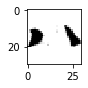

predicted:  が


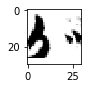

predicted:  い


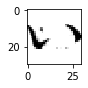

predicted:  け


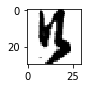

predicted:  に


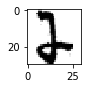

predicted:  に


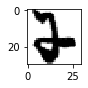

predicted:  の


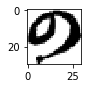

predicted:  こ


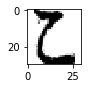

predicted:  の


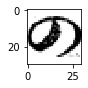

predicted:  や


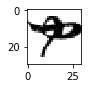

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

for i in range(10):
    image = X[i].reshape(30,30)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    print("predicted: ", unicode_to_char[y[i]])
    plt.show()


In [8]:
from sklearn.model_selection import train_test_split

X = X.astype('float32')
X /= 255
y = np_utils.to_categorical(y, 82)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [9]:
model = Sequential()
input_size = 900
hidden_neurons = 630
out_size = len(unicode_to_int)

model.add(Dense(hidden_neurons, input_dim = input_size))
model.add(Activation('sigmoid')) 
model.add(Dense(out_size, input_dim = hidden_neurons))
model.add(Activation('softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

fitted_model = model.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs=30, verbose=1)

Train on 259886 samples, validate on 128005 samples
Epoch 1/30
259886/259886 [==============================] - 100s 384us/step - loss: 1.1065 - accuracy: 0.7235 - val_loss: 0.7413 - val_accuracy: 0.8082
Epoch 2/30
259886/259886 [==============================] - 103s 397us/step - loss: 0.6553 - accuracy: 0.8299 - val_loss: 0.6205 - val_accuracy: 0.8394
Epoch 3/30
259886/259886 [==============================] - 98s 379us/step - loss: 0.5679 - accuracy: 0.8509 - val_loss: 0.5822 - val_accuracy: 0.8468
Epoch 4/30
259886/259886 [==============================] - 104s 402us/step - loss: 0.5276 - accuracy: 0.8601 - val_loss: 0.5732 - val_accuracy: 0.8493
Epoch 5/30
259886/259886 [==============================] - 105s 403us/step - loss: 0.5000 - accuracy: 0.8660 - val_loss: 0.5527 - val_accuracy: 0.8549
Epoch 6/30
259886/259886 [==============================] - 98s 378us/step - loss: 0.4825 - accuracy: 0.8696 - val_loss: 0.5445 - val_accuracy: 0.8572
Epoch 7/30
259886/259886 [============

In [11]:
y_predict = model.predict(X_test, verbose=0)
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

43099/43099 [==============================] - 3s 60us/step
[0.5674677671803994, 0.8671430945396423]


(23, 62, 43)
predicted:  も actual:  は


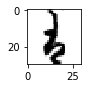

(24, 20, 69)
predicted:  じ actual:  ら


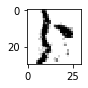

(45, 68, 58)
predicted:  よ actual:  ま


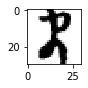

(53, 43, 32)
predicted:  は actual:  つ


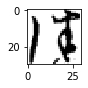

(59, 62, 36)
predicted:  も actual:  と


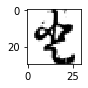

(65, 6, 37)
predicted:  お actual:  ど


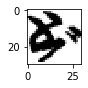

(68, 16, 37)
predicted:  ご actual:  ど


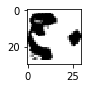

(70, 12, 50)
predicted:  ぐ actual:  ぶ


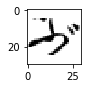

(82, 9, 17)
predicted:  き actual:  さ


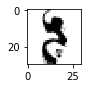

(88, 62, 7)
predicted:  も actual:  か


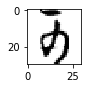

(96, 7, 71)
predicted:  か actual:  る


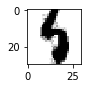

(103, 17, 45)
predicted:  さ actual:  ぱ


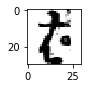

(110, 58, 68)
predicted:  ま actual:  よ


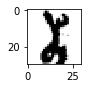

(116, 55, 71)
predicted:  ほ actual:  る


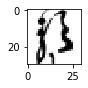

(119, 42, 32)
predicted:  の actual:  つ


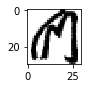

(134, 7, 4)
predicted:  か actual:  う


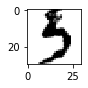

(157, 70, 13)
predicted:  り actual:  け


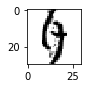

(170, 62, 77)
predicted:  も actual:  を


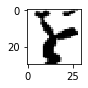

(173, 49, 64)
predicted:  ふ actual:  や


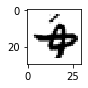

(182, 42, 41)
predicted:  の actual:  ね


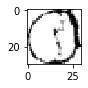

(191, 66, 49)
predicted:  ゆ actual:  ふ


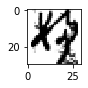

In [12]:
%matplotlib inline

mistakes = []
for i in range(len(y_predict)):
    max_p = 0
    max_a = 0
    for j in range(len(unicode_to_int)):
        if y_predict[i][max_p] < y_predict[i][j]:
            max_p = j
        if y_test[i][max_a] < y_test[i][j]:
            max_a = j
    if max_p != max_a:
        mistakes.append((i,max_p,max_a))
    if len(mistakes) > 20:
        break;

for m in mistakes:
    (mistake, predicted, actual) = m
    print(m)
    print("predicted: ", unicode_to_char[predicted], "actual: ", unicode_to_char[actual])
    image = X_test[mistake].reshape(30,30)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()    
    j += 1


In [13]:
from sklearn import metrics

y_predict_p = model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test.argmax(1), y_predict_p[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)

print(AUC)

0.9986911891828554


### Increasing accuracy by duplicating sparce data

In [24]:
char_counts = pd.DataFrame(df_hiragana.groupby(['character']).size(), columns=["count"])
print("counts: \n", char_counts.sort_values(by=["count"][:10]))

counts: 
            count
character       
U+3087         3
U+3083         4
U+3085         5
U+3077        14
U+309F        31
U+307A        31
U+3074        33
U+3063        39
U+307D        45
U+3071       119
U+3032       187
U+3062       344
U+305C       395
U+3091       396
U+3090       428
U+309E       564
U+3048       625
U+3050       632
U+307C       697
U+304E       747
U+3052       859
U+305E       871
U+3076       931
U+3065      1077
U+3073      1127
U+3056      1357
U+3054      1385
U+3080      1509
U+3086      1604
U+306C      1810
...          ...
U+304A      5953
U+3084      6141
U+3042      6185
U+3059      6592
U+3046      6725
U+304C      6740
U+3093      6994
U+3064      7052
U+3075      7076
U+3055      7089
U+308C      7144
U+304D      7686
U+307E      8075
U+3078      8168
U+304F      9167
U+305F      9973
U+3089     10089
U+308B     11617
U+3044     11903
U+3082     12325
U+306A     13750
U+308A     14184
U+304B     14342
U+306F     14758
U+3092     15743
U+30

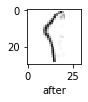

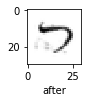

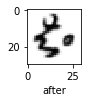

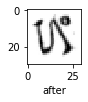

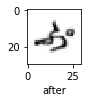

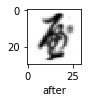

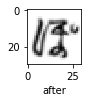

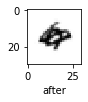

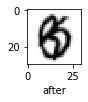

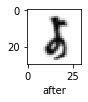

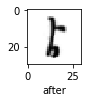

In [25]:
import cv2 as cv
import random
from scipy import ndimage

MINIMUM_DATA = 200

hiragana_additions = []
under_min = char_counts.loc[char_counts["count"] < MINIMUM_DATA].to_dict()['count']
show_sample = 20

for char in under_min:
    show_this_sample = True
    remaining_to_add = MINIMUM_DATA - under_min[char]
    char_existing = df_hiragana.loc[df_hiragana["character"] == char]
    char_existing = char_existing.drop(columns=["character"])
    while remaining_to_add > 0:
        for existing in range(len(char_existing)):
            if (remaining_to_add < 1):
                break
            
            image *= 255
            image = image.astype('int')
            image = np.array(char_existing.iloc[[existing]]).reshape(30,30)
#             if show_sample > 0 and show_this_sample:
#                 plt.figure(figsize=(1,1))
#                 plt.xlabel("before")
#                 plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest', label="before")
            
            rotation = random.randint(-20,20)            
            resize = random.randint(70,100)
            position_updown = random.randint(-10,10)
            position_leftright = random.randint(-10,10)
            old_size = image.shape[1]
            
            new_size = int(old_size * (resize/100))
            image = np.array(image, dtype='uint8')
            image = cv.resize(image,(new_size,new_size))
            
            pad_total = old_size - image.shape[1]
            pad = pad_total/2
            padding = [pad,pad,pad,pad]
            up_pad_diff = pad * (position_updown/100)
            padding[0] = int(padding[0] - up_pad_diff)
            padding[1] = int(padding[1] + up_pad_diff)
            right_pad_diff = pad * (position_leftright/100)
            padding[2] = int(padding[2] - right_pad_diff)
            padding[3] = int(padding[3] + right_pad_diff)
            if (padding[0] + padding[1]) % 2 == 1 or pad_total == 1 :
                padding[0] += 1
            if (padding[2] + padding[3]) % 2 == 1 or pad_total == 1 :
                padding[2] += 1
            image = cv.copyMakeBorder(image, padding[0], padding[1], padding[2], padding[3], cv.BORDER_CONSTANT,value=[255,255,255])

            image = ndimage.rotate(image, rotation, reshape="true", mode="constant", cval=255)
            image = cv.resize(image,(old_size,old_size))
            #image = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,21,15)
            #r, image = cv.threshold(image,150,255,cv.THRESH_BINARY)
            if show_sample > 0 and show_this_sample:
                plt.figure(figsize=(1,1))            
                plt.xlabel("after")
                plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
                plt.show()
                show_sample -= 1
                show_this_sample = False
            
            remaining_to_add -= 1
            image.reshape(900)
            hiragana_additions.append(np.append(image,char))
    

In [26]:
print("Adding to data:", len(hiragana_additions))

Adding to data: 1689


In [27]:
df_hiragana_additions = pd.DataFrame(columns=df_hiragana.columns, data=hiragana_additions)
print(df_hiragana_additions.head())
df_hiragana_minimum = pd.concat([df_hiragana, df_hiragana_additions], ignore_index=True)
char_counts = pd.DataFrame(df_hiragana_minimum.groupby(['character']).size(), columns=["count"])
print("counts: \n", char_counts.sort_values(by=["count"])[:10])

     0    1    2    3    4    5    6    7    8    9  ...  891  892  893  894  \
0  255  255  255  255  255  255  255  255  255  255  ...  255  255  255  255   
1  255  255  255  255  255  255  255  255  255  255  ...  255  255  255  255   
2  255  255  255  255  255  255  255  255  255  255  ...  255  255  255  255   
3  255  255  255  255  255  255  255  255  255  255  ...  255  255  255  255   
4  255  255  255  255  255  255  255  255  255  255  ...  255  255  255  255   

   895  896  897  898  899 character  
0  255  255  255  255  255    U+3032  
1  255  255  255  255  255    U+3032  
2  255  255  255  255  255    U+3032  
3  255  255  255  255  255    U+3032  
4  255  255  255  255  255    U+3032  

[5 rows x 901 columns]
counts: 
            count
character       
U+309F       200
U+3032       200
U+3071       200
U+3074       200
U+3087       200
U+3077       200
U+307A       200
U+3085       200
U+3083       200
U+3063       200


In [28]:
X = df_hiragana_minimum.drop(columns=["character"])
y = df_hiragana_minimum["character"]

y = y.map(unicode_to_int)  

# Some values in the dataframe were showing as nan, so we have to get rid of them manually.
drops = []
for i in range(0,len(y)):
    if math.isnan(y[i]):
        drops.append(i)

y = y.drop(drops)
X = X.drop(drops)

y = list(y)
X = X.to_numpy().astype('int')
X = X.astype('float32')
X /= 255
y = np_utils.to_categorical(y, 82)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [29]:
model_min = Sequential()
model_min.add(Dense(hidden_neurons, input_dim = input_size))
model_min.add(Activation('sigmoid'))
model_min.add(Dense(out_size, input_dim = hidden_neurons))
model_min.add(Activation('softmax'))

model_min.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

fitted_model = model_min.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs=30, verbose=1)


Train on 260905 samples, validate on 128506 samples
Epoch 1/30
260905/260905 [==============================] - 99s 378us/step - loss: 1.1101 - accuracy: 0.7228 - val_loss: 0.7327 - val_accuracy: 0.8124
Epoch 2/30
260905/260905 [==============================] - 99s 380us/step - loss: 0.6620 - accuracy: 0.8289 - val_loss: 0.6516 - val_accuracy: 0.8284
Epoch 3/30
260905/260905 [==============================] - 100s 382us/step - loss: 0.5755 - accuracy: 0.8488 - val_loss: 0.6041 - val_accuracy: 0.8423
Epoch 4/30
260905/260905 [==============================] - 99s 378us/step - loss: 0.5310 - accuracy: 0.8586 - val_loss: 0.5704 - val_accuracy: 0.8502
Epoch 5/30
260905/260905 [==============================] - 99s 379us/step - loss: 0.5018 - accuracy: 0.8652 - val_loss: 0.5701 - val_accuracy: 0.8499
Epoch 6/30
260905/260905 [==============================] - 99s 380us/step - loss: 0.4817 - accuracy: 0.8693 - val_loss: 0.5608 - val_accuracy: 0.8522
Epoch 7/30
260905/260905 [===============

In [30]:
y_predict = model_min.predict(X_test, verbose=0)
score = model_min.evaluate(X_test, y_test, verbose=1)
print("\n ACCURACY:", score)

43268/43268 [==============================] - 3s 63us/step

 ACCURACY: [0.5832847983479842, 0.8567532300949097]


(1, 45, 21)
predicted:  ぱ actual:  す


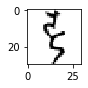

(11, 3, 7)
predicted:  い actual:  か


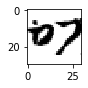

(12, 29, 30)
predicted:  ち actual:  ぢ


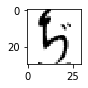

(16, 77, 23)
predicted:  を actual:  せ


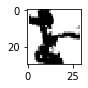

(24, 42, 61)
predicted:  の actual:  め


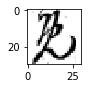

(25, 74, 39)
predicted:  わ actual:  に


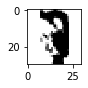

(29, 39, 73)
predicted:  に actual:  ろ


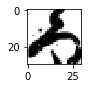

(33, 49, 43)
predicted:  ふ actual:  は


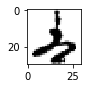

(43, 9, 17)
predicted:  き actual:  さ


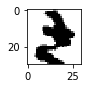

(58, 70, 40)
predicted:  り actual:  ぬ


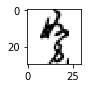

(60, 39, 68)
predicted:  に actual:  よ


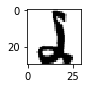

(66, 19, 20)
predicted:  し actual:  じ


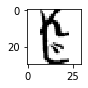

(74, 9, 27)
predicted:  き actual:  た


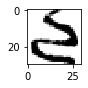

(89, 32, 77)
predicted:  つ actual:  を


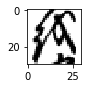

(92, 64, 66)
predicted:  や actual:  ゆ


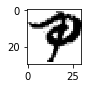

(98, 10, 28)
predicted:  ぎ actual:  だ


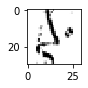

(100, 74, 38)
predicted:  わ actual:  な


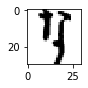

(112, 37, 36)
predicted:  ど actual:  と


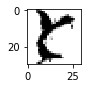

(114, 3, 32)
predicted:  い actual:  つ


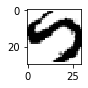

(125, 49, 19)
predicted:  ふ actual:  し


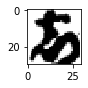

(126, 55, 46)
predicted:  ほ actual:  ひ


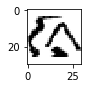

In [31]:
mistakes = []
for i in range(len(y_predict)):
    max_p = 0
    max_a = 0
    for j in range(len(unicode_to_int)):
        if y_predict[i][max_p] < y_predict[i][j]:
            max_p = j
        if y_test[i][max_a] < y_test[i][j]:
            max_a = j
    if max_p != max_a:
        mistakes.append((i,max_p,max_a))
    if len(mistakes) > 20:
        break;

for m in mistakes:
    (mistake, predicted, actual) = m
    print(m)
    print("predicted: ", unicode_to_char[predicted], "actual: ", unicode_to_char[actual])
    image = X_test[mistake].reshape(30,30)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()    
    j += 1


In [32]:
from sklearn import metrics

y_predict_minp = model_min.predict_proba(X_test)
fpr_min, tpr_min, thresholds_min = metrics.roc_curve(y_test.argmax(1), y_predict_minp[:,1], pos_label=1)
AUC_min = metrics.auc(fpr_min, tpr_min)

print(AUC_min)

0.9958037276463988


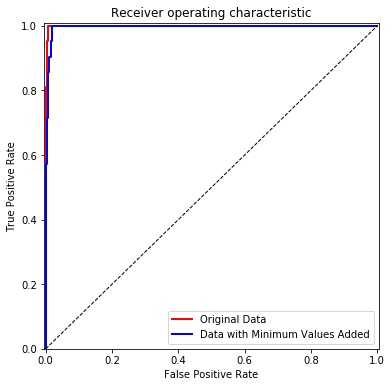

In [33]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red', lw=2, label='Original Data')
plt.plot(fpr_min, tpr_min, color='blue', lw=2, label='Data with Minimum Values Added')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()